# Project:  Sample Superstore



## Author: Youssef Soultan


### Question for Analysis
- What is the weak areas where you can work to make more profit? 


In [172]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling



In [173]:
# Load Data

df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [174]:
df.shape

(9994, 13)

- The data set has 9994 rows and 13 columns

In [225]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9977 non-null   object 
 1   segment       9977 non-null   object 
 2   country       9977 non-null   object 
 3   city          9977 non-null   object 
 4   state         9977 non-null   object 
 5   postal_code   9977 non-null   int64  
 6   region        9977 non-null   object 
 7   category      9977 non-null   object 
 8   sub_category  9977 non-null   object 
 9   sales         9977 non-null   float64
 10  quantity      9977 non-null   int64  
 11  discount      9977 non-null   float64
 12  profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [176]:
#check for duplicates

sum(df.duplicated())

17

- There is 17 duplicated values so we will remove them.

In [177]:
#check for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- There is no missing values.

In [14]:
# Statistical information

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [123]:
# Unique number of rows in each column.

df.nunique()

ship_mode          4
segment            3
country            1
city             531
state             49
postal_code      631
region             4
category           3
sub_category      17
sales           5825
quantity          14
discount          12
profit          7287
dtype: int64

- There is only one country so we can remove it.

## Data Cleaning

In [179]:
# make cloumns names to lowercase

df.rename(columns = lambda x : x.lower(),inplace = True)

In [181]:
df.rename(columns = {'sub-category' : 'sub_category','postal code' : 'postal_code','ship mode' : 'ship_mode'},inplace = True)

In [183]:
# Removing Duplicates

df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

- There is no duplicates now.

## Data Visualization 

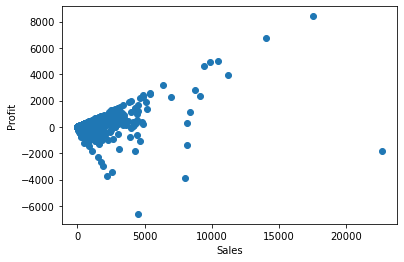

In [121]:
plt.title('Relation between sales and profit')
x = df['sales']
y = df['profit']
plt.scatter(x , y)
plt.xlabel('Sales')
plt.ylabel('Profit');

- As we see here Profit is highly correlated with Sales

## Sales and Profit Analysis among Region

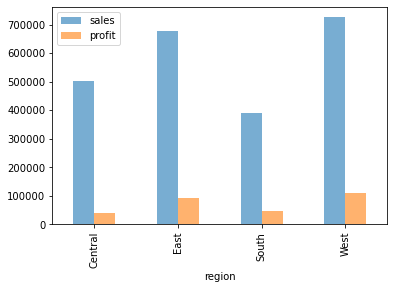

In [169]:
df.groupby('region').sum()[['sales','profit']].plot(kind = 'bar',alpha = 0.6);

- The most region for sales and profit is West region.
- The lowest sales region is South region
- The lowest profit region is Central region

## Sales and Profit Analysis among States

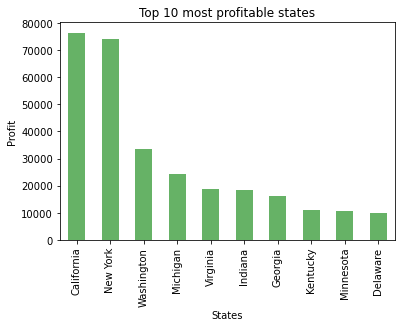

In [202]:
df.groupby('state').sum()['profit'].sort_values(ascending= False)[:10].plot(kind = 'bar',color = 'green',alpha = 0.6);
plt.title ('Top 10 most profitable states')
plt.xlabel('States')
plt.ylabel('Profit');

- The most profitable states is California and New York.

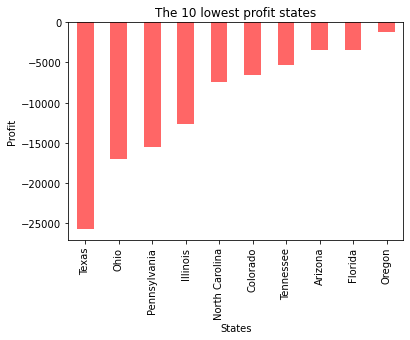

In [201]:
df.groupby('state').sum()['profit'].sort_values(ascending= True)[:10].plot(kind = 'bar',color = 'red',alpha = 0.6)
plt.title ('The 10 lowest profit states')
plt.xlabel('States')
plt.ylabel('Profit');

- These are the weak states where the company must work to make more profit.

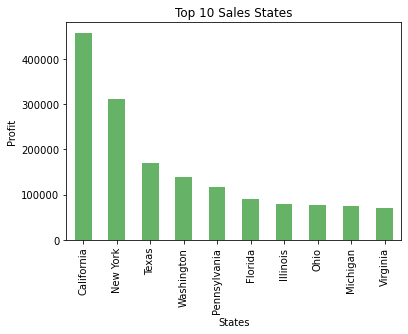

In [206]:
df.groupby('state').sum()['sales'].sort_values(ascending= False)[:10].plot(kind = 'bar',color = 'green' ,alpha = 0.6)
plt.title ('Top 10 Sales States')
plt.xlabel('States')
plt.ylabel('Profit');

- The most sales state is California

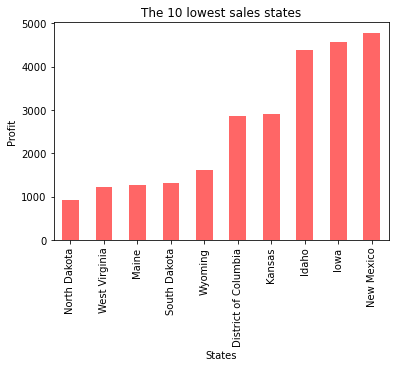

In [224]:
df.groupby('state').sum()['sales'].sort_values(ascending= True)[:10].plot(kind = 'bar', color = 'red', alpha = 0.6)
plt.title ('The 10 lowest sales states')
plt.xlabel('States')
plt.ylabel('Profit');

- These are the weak states for sales where the company must work to make more sales.

## Sales and Profit Analysis among Cities

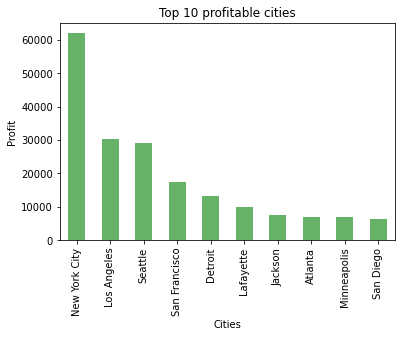

In [209]:
df.groupby('city').sum()['profit'].sort_values(ascending= False)[:10].plot(kind = 'bar',color = 'green' ,alpha = 0.6)
plt.title ('Top 10 profitable cities')
plt.xlabel('Cities')
plt.ylabel('Profit');

- The most profitable city is New York

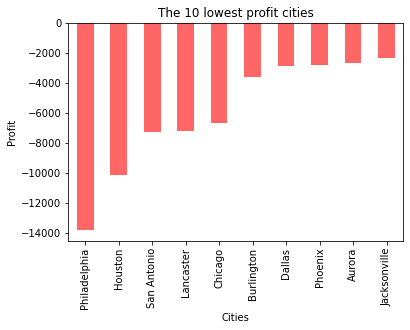

In [210]:
df.groupby('city').sum()['profit'].sort_values(ascending= True)[:10].plot(kind = 'bar',color = 'red' ,alpha = 0.6)
plt.title ('The 10 lowest profit cities')
plt.xlabel('Cities')
plt.ylabel('Profit');

- These are the weak cities where the company must work to make more profit.

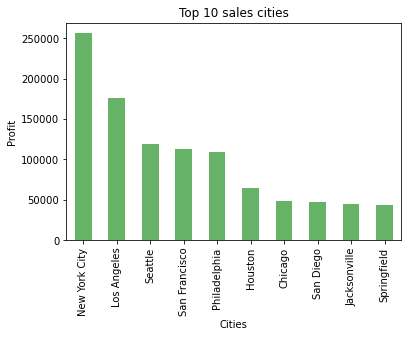

In [211]:
df.groupby('city').sum()['sales'].sort_values(ascending= False)[:10].plot(kind = 'bar',color = 'green' ,alpha = 0.6)
plt.title ('Top 10 sales cities')
plt.xlabel('Cities')
plt.ylabel('Profit');

- The most sales city is New York

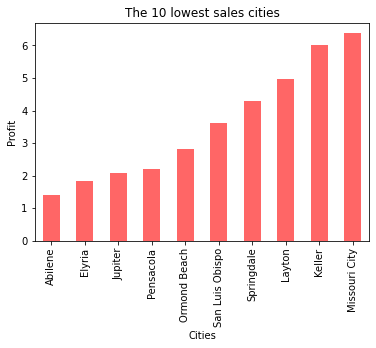

In [215]:
df.groupby('city').sum()['sales'].sort_values(ascending= True)[:10].plot(kind = 'bar',color = 'red' ,alpha = 0.6)
plt.title ('The 10 lowest sales cities')
plt.xlabel('Cities')
plt.ylabel('Profit');

- These are the weak cities for sales where the company must work to make more sales.

## Conclusions

- The Highest State for sales and profit is California and New York is the second.
- The Highest City for profit is New York and Los Angeles is the second. 
- The Highest Region for sales and profit is West Region.
- The Lowest State for profit is Texas and for sales is New Dakota.
- The Lowest City for profit is Philadelphia and for sales is Abilene
- There are alot of states and cities need to be imporved but these are the lowest.
- The Lowest Region profit is Central region and for sales is South region